# HW2
Name: Dhanabordee Mekintharanggur
ID: 6238077121

In [110]:
%matplotlib inline
import numpy as np # n-dimensional array object & math functions
import pandas as pd # load data into dataframe
import sklearn #scikit-learn algorithms for machine learning
import scipy # scientific computing: linear algebra, optimization, signal processing, statistics
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # advanced statistical plots
from matplotlib import rcParams

# Setup

In [111]:
# Setup
def printf(format, *values):
    print(format % values )

rcParams['figure.figsize'] = 11.7,8.27

In [112]:
df = pd.read_csv("HW2_Housing_Survey-661316-16744512087594.csv")
df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,...,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,...,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,...,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,...,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,...,127,36,119,121,116,209,97,176,144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,...,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,...,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,...,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,...,201,123,38,104,186,203,132,118,201,125


### Q1: How many properties are worth $1,000,000 or more?

In [113]:
# Define the condition
condition = df["VAL"] == 24

# Count the number of rows that match the condition
properties_worth_over_million_count = df.loc[condition, "VAL"].size
printf(f"There are %d properties that are worth more than $1000000.", properties_worth_over_million_count)

There are 53 properties that are worth more than $1000000.


<AxesSubplot:title={'center':'Count of properties in each price range'}, xlabel='Property worth group number', ylabel='count'>

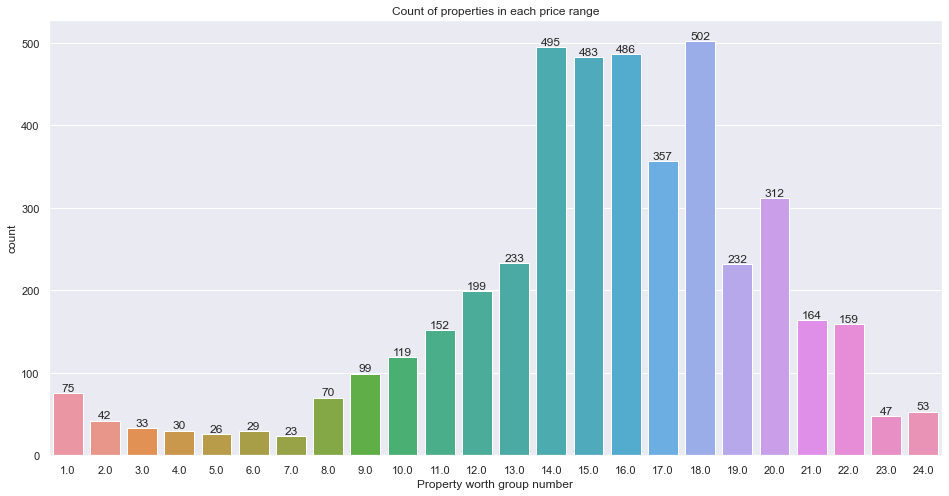

In [114]:
# Plot the count
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.countplot(x="VAL", data=df)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Property worth group number")
ax.set_title("Count of properties in each price range")
ax

In [115]:
df['VAL'].value_counts().sort_index()

1.0      75
2.0      42
3.0      33
4.0      30
5.0      26
6.0      29
7.0      23
8.0      70
9.0      99
10.0    119
11.0    152
12.0    199
13.0    233
14.0    495
15.0    483
16.0    486
17.0    357
18.0    502
19.0    232
20.0    312
21.0    164
22.0    159
23.0     47
24.0     53
Name: VAL, dtype: int64

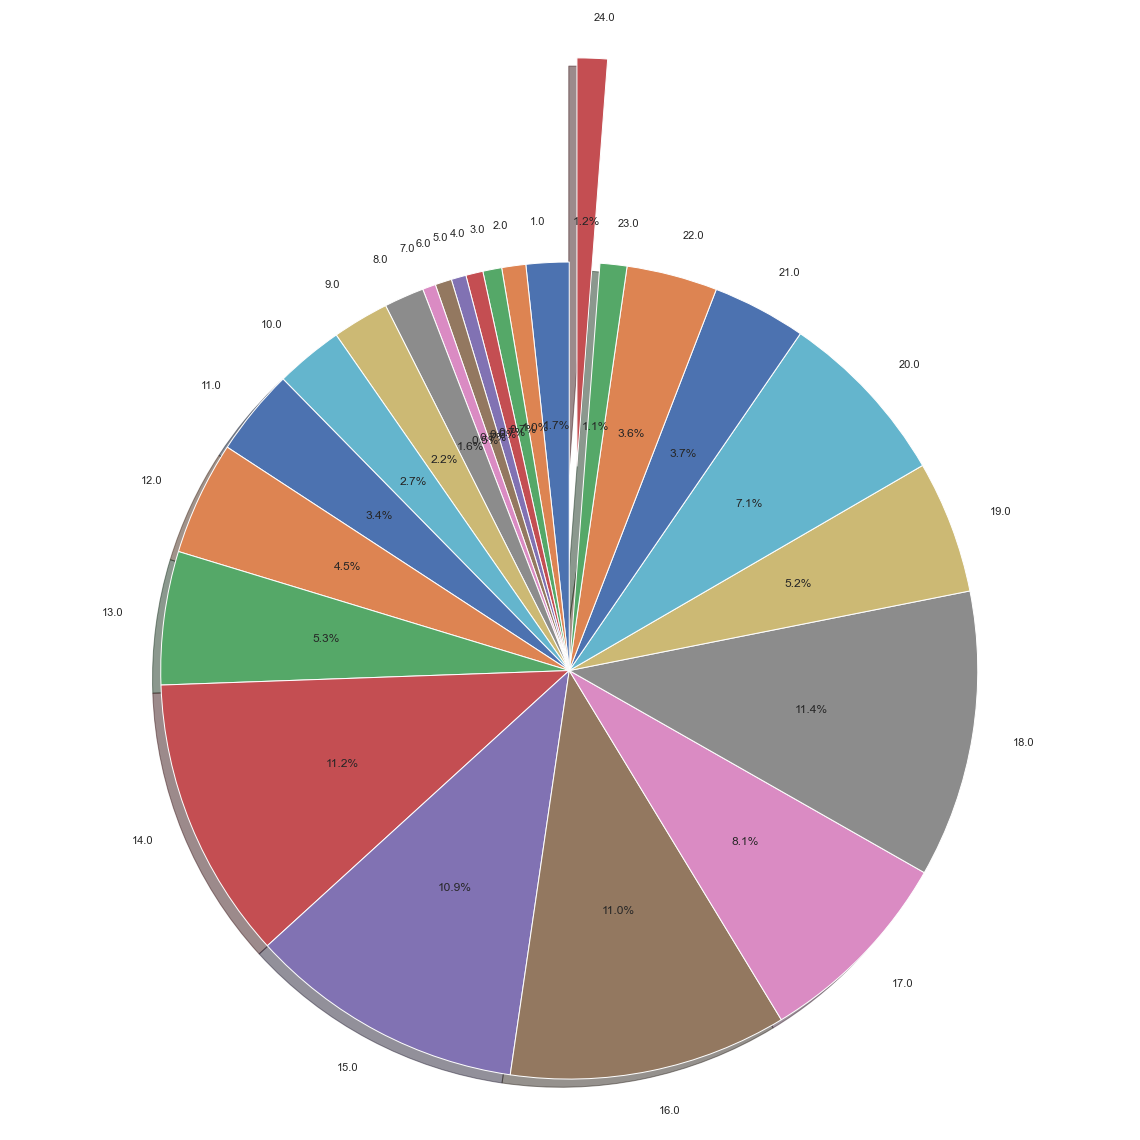

In [116]:
# Pie chart
sns.set(rc={'figure.figsize':(16,16)})

sizes = df['VAL'].value_counts().sort_index().values
labels = df['VAL'].value_counts().sort_index().index.tolist()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Q2: How many people recorded in a house on average?

In [117]:
number_of_person_recorded_list = df.loc[df["TYPE"] == 1, "NP"]
avg_number_of_person_recorded = np.average(number_of_person_recorded_list)
print(avg_number_of_person_recorded)

2.369985382491473


In [118]:
number_of_person_recorded_list = df["NP"]
avg_number_of_person_recorded = np.average(number_of_person_recorded_list)
print(avg_number_of_person_recorded)

2.2984913793103448


### Q3 Draw a graph to show the relationship between the property value and the number of persons recorded

In [119]:
df_on_sale = df.copy().dropna(axis=0, subset=['VAL'])

In [120]:
# Group the rows by the values of two columns
grouped_df = df_on_sale.groupby(["VAL", "NP"])

# Get the count of each group
group_counts = grouped_df.size().reset_index(name = "Counts")

df_on_sale['VAL_NP_COUNT'] = np.nan
for i in range(0, 6495):
  df_on_sale['VAL_NP_COUNT'][i] = group_counts[(group_counts['VAL'] == df['VAL'][i]) & (group_counts['NP'] == df['NP'][i])]['Counts']

df_on_sale

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_25904/25291899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on_sale['VAL_NP_COUNT'][i] = group_counts[(group_counts['VAL'] == df['VAL'][i]) & (group_counts['NP'] == df['NP'][i])]['Counts']
/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_25904/25291899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on_sale['VAL_NP_COUNT'][i] = group_counts[(group_counts['VAL'] == df['VAL'][i]) & (group_counts['NP'] == df['NP'][i])]['Counts']
/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_25904/25291899.py:9: SettingWithCopyWarning: 
A val

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,...,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80,VAL_NP_COUNT
0,H,186,8,700,4,16,1015675,89,4,1,...,27,93,151,28,79,25,101,157,129,47.0
2,H,395,8,100,4,16,1015675,106,2,1,...,119,168,107,95,101,30,124,106,31,225.0
3,H,506,8,700,4,16,1015675,240,4,1,...,359,385,71,234,421,76,77,242,231,43.0
4,H,835,8,800,4,16,1015675,118,4,1,...,36,119,121,116,209,97,176,144,38,45.0
5,H,989,8,700,4,16,1015675,115,4,1,...,34,109,199,116,110,211,120,31,189,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,H,1356102,8,800,4,16,1015675,34,2,1,...,41,37,36,35,50,74,32,38,38,11.0
6488,H,1356950,8,500,4,16,1015675,71,3,1,...,66,68,68,75,24,19,22,64,21,86.0
6489,H,1357182,8,700,4,16,1015675,23,2,1,...,26,22,20,19,37,6,20,21,39,194.0
6492,H,1357340,8,400,4,16,1015675,58,2,1,...,101,62,52,105,75,20,127,105,68,194.0


Text(0.5, 1.0, 'Scatterplot between NP and VAL')

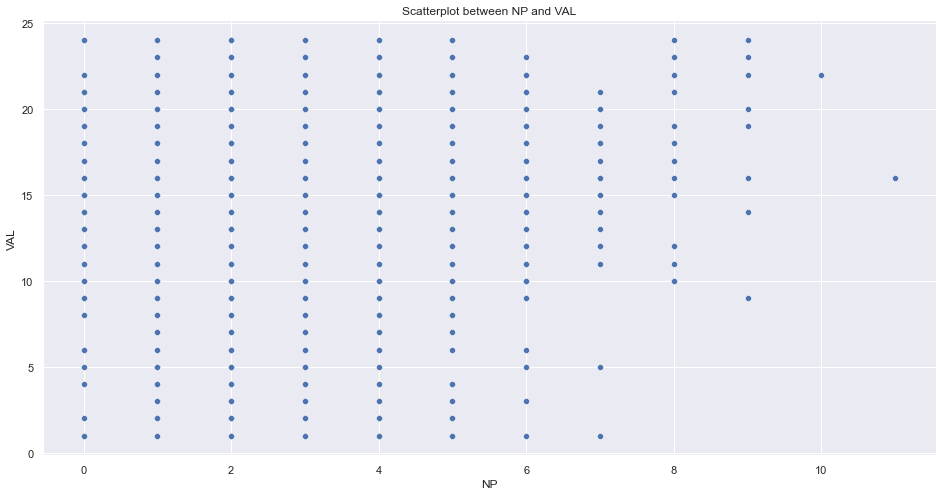

In [130]:
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.scatterplot(data=df_on_sale, x="NP", y="VAL", legend="auto")
ax.set_title("Scatterplot between NP and VAL")

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_25904/2307667218.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(sm).set_label("NP & VAL pair occurence count")


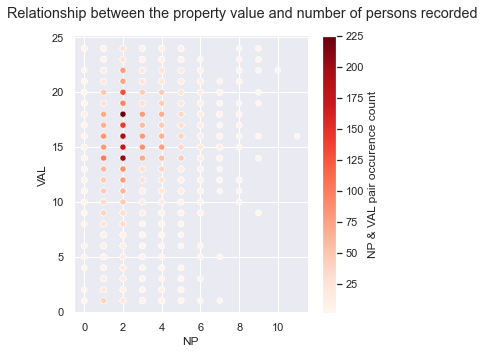

In [122]:
# setup the colorbar
norm = plt.Normalize(df_on_sale['VAL_NP_COUNT'].min(), df_on_sale['VAL_NP_COUNT'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)

# Plot the relationship between the property value and number of persons recorded
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.relplot(data=df_on_sale, x="NP", y="VAL", hue="VAL_NP_COUNT", palette="Reds", legend="auto")
ax.fig.suptitle("Relationship between the property value and number of persons recorded")
ax.fig.subplots_adjust(top=0.9);
ax._legend.remove()
ax.figure.colorbar(sm).set_label("NP & VAL pair occurence count")
plt.show(ax)

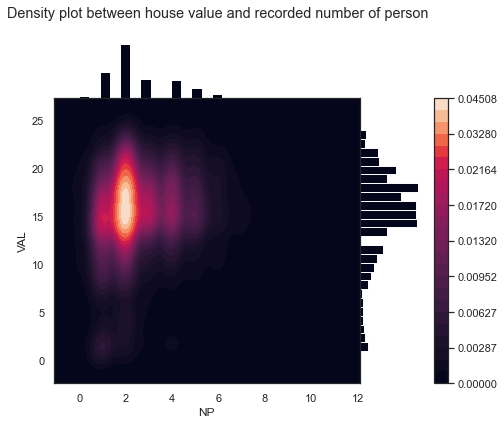

In [123]:
sns.set_theme(style="white")
ax = sns.JointGrid(data=df_on_sale, x="NP", y="VAL", space=0)
ax.plot_joint(sns.kdeplot,
             fill=True, 
             thresh=0, levels=25, cmap="rocket", cbar=True)
ax.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25,)

# Set plot position
ax.fig.suptitle("Density plot between house value and recorded number of person")
plt.subplots_adjust(top=0.9)
pos_joint_ax = ax.ax_joint.get_position()
pos_marg_x_ax = ax.ax_marg_x.get_position()
ax.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
ax.fig.axes[-1].set_position([1, pos_joint_ax.y0, 1, pos_joint_ax.height])
plt.show()

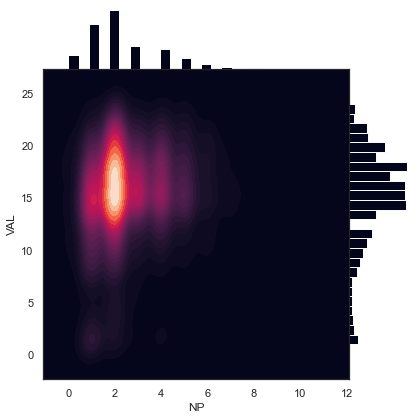

In [124]:
sns.set_theme(style="white")
ax = sns.JointGrid(data=df, x="NP", y="VAL", space=0)
ax.plot_joint(sns.kdeplot,
             fill=True, 
             thresh=0, levels=25, cmap="rocket")
ax.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

In [125]:
df["VAL"].corr(df["NP"])

0.13061541451180145

### Q4: Normalize family income into a range (0-1). Compare before vs after in histogram

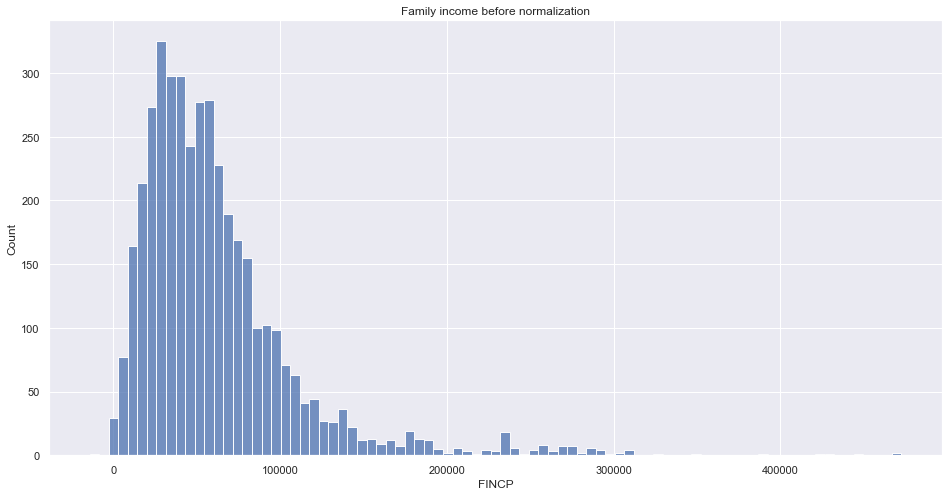

In [135]:
# Plot the histogram of income before normalization
ax = sns.histplot(df['FINCP'])
ax.set_title("Family income before normalization")
plt.show(ax)

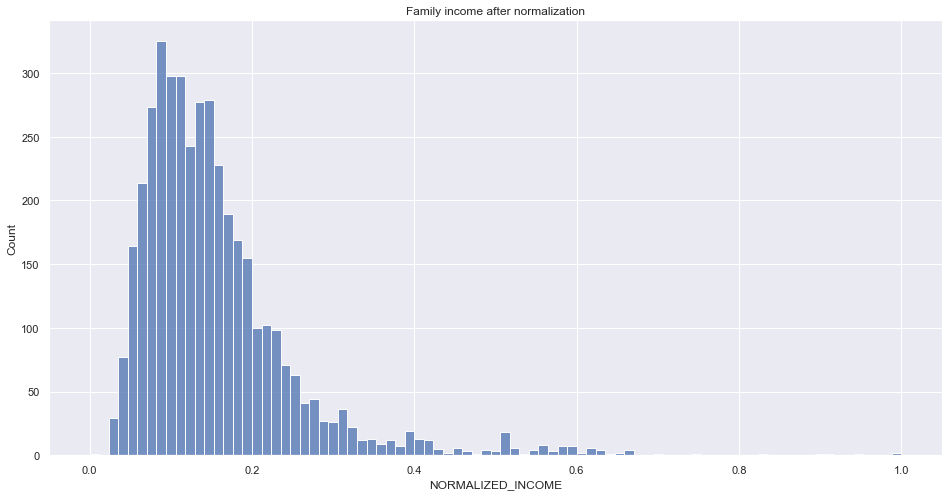

In [136]:
# Compute the minimum and maximum values
min_val = df["FINCP"].min()
max_val = df["FINCP"].max()
range_val = max_val - min_val

# Normalize the income column
df["NORMALIZED_INCOME"] = (df["FINCP"] - min_val) / range_val

# Plot the histogram of income after normalization
ax = sns.histplot(df['NORMALIZED_INCOME'])
ax.set_title("Family income after normalization")
plt.show(ax)

### Q5: Use 5 bins for both cases

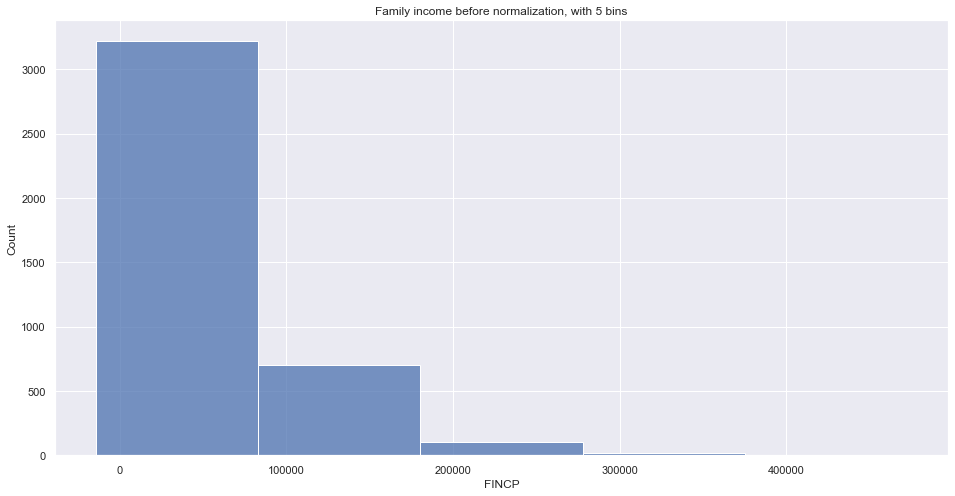

In [137]:
# Plot the histogram of income before normalization
ax = sns.histplot(df['FINCP'], bins=5)
ax.set_title("Family income before normalization, with 5 bins")
plt.show(ax)

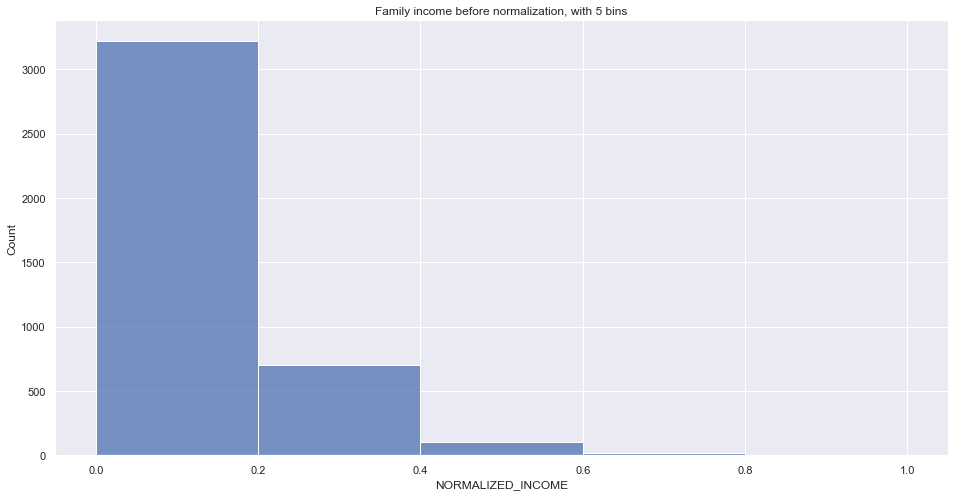

In [138]:
# Compute the minimum and maximum values
min_val = df["FINCP"].min()
max_val = df["FINCP"].max()
range_val = max_val - min_val

# Normalize the income column
df["NORMALIZED_INCOME"] = (df["FINCP"] - min_val) / range_val

# Plot the histogram of income after normalization
ax = sns.histplot(df['NORMALIZED_INCOME'], bins=5)
ax.set_title("Family income before normalization, with 5 bins")
plt.show(ax)